In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def calculate_returns(pred_df, ret_l, ret_s, commission_rate):
    df = pred_df.copy()
    df["trade"] = 0  # initialize trade column
    df.loc[df["y_pred"] > ret_l, "trade"] = 1  # long trade
    df.loc[df["y_pred"] < ret_s, "trade"] = -1  # short trade
    df['diff'] = df.trade.shift(1) - df.trade
    df['diff'].iloc[0] = 1
    
    df["returns"] = df["trade"] * df["y_true"] - abs(df['diff']) * commission_rate
    df["long_count"] = df["trade"].apply(lambda x: 1 if x > 0 else 0)
    df["short_count"] = df["trade"].apply(lambda x: 1 if x < 0 else 0)
    long_count = df.groupby("date")["long_count"].sum()
    short_count = df.groupby("date")["short_count"].sum()
    daily_returns = df.groupby("date")["returns"].sum()
    df['diff'] = abs(df['diff'])
    num_trades = df.groupby('date')['diff'].sum() / 2
    print('平均每天交易次数为:', np.mean(num_trades))
    y_true_notzero = df.y_true[df.y_true != 0]
    y_pred_notzero = df.y_pred.iloc[y_true_notzero.index]
    y_true_class = (y_true_notzero > 0) * 1
    y_pred_class = (y_pred_notzero > 0) * 1
    acc = accuracy_score(y_true_class, y_pred_class)
    print('预测准确率为:', acc)
    return pd.DataFrame(
        {
            "long_count": long_count,
            "short_count": short_count,
            "daily_returns": daily_returns,
        }
    )




/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 39.575
预测准确率为: 0.6834928229665072


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 22.975
预测准确率为: 0.6834928229665072


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 16.625
预测准确率为: 0.6834928229665072


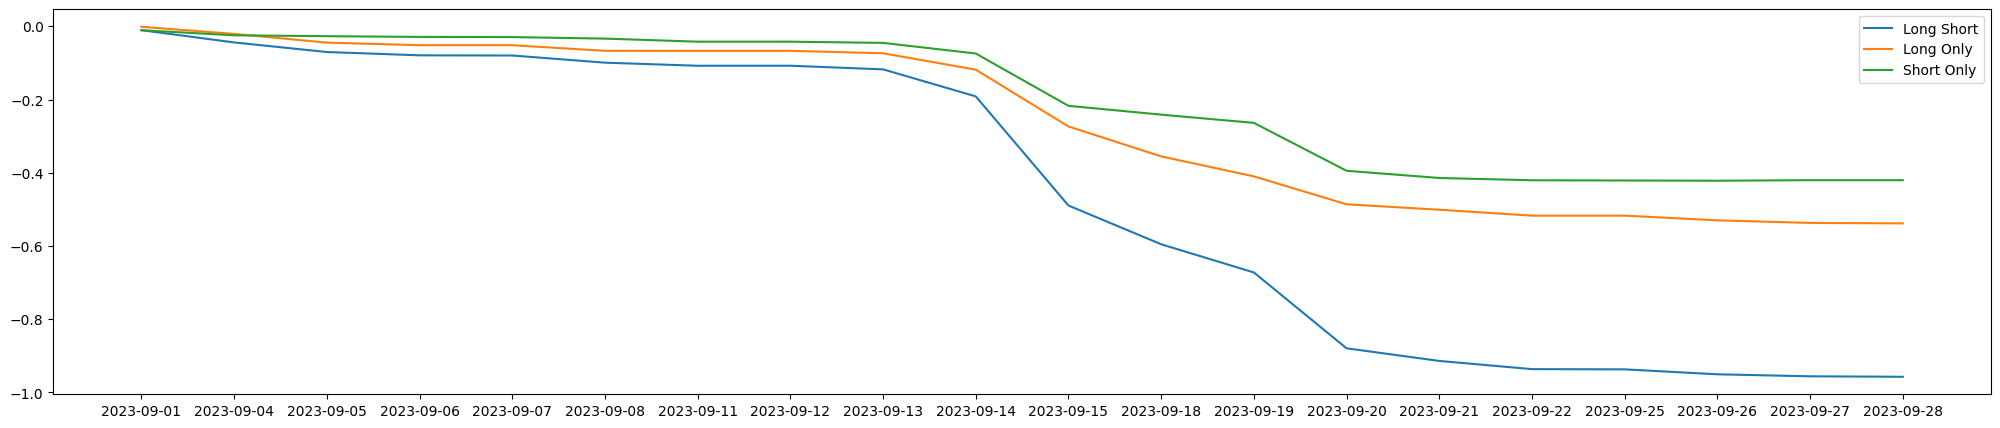

In [395]:
pred_df = pd.read_csv("predict_2603_lgbm_tick.csv")
threshold = 1e-5
commision_rate = 0.0014 # 折算单边手续费
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 39.575
预测准确率为: 0.6834928229665072


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 22.975
预测准确率为: 0.6834928229665072


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 16.625
预测准确率为: 0.6834928229665072


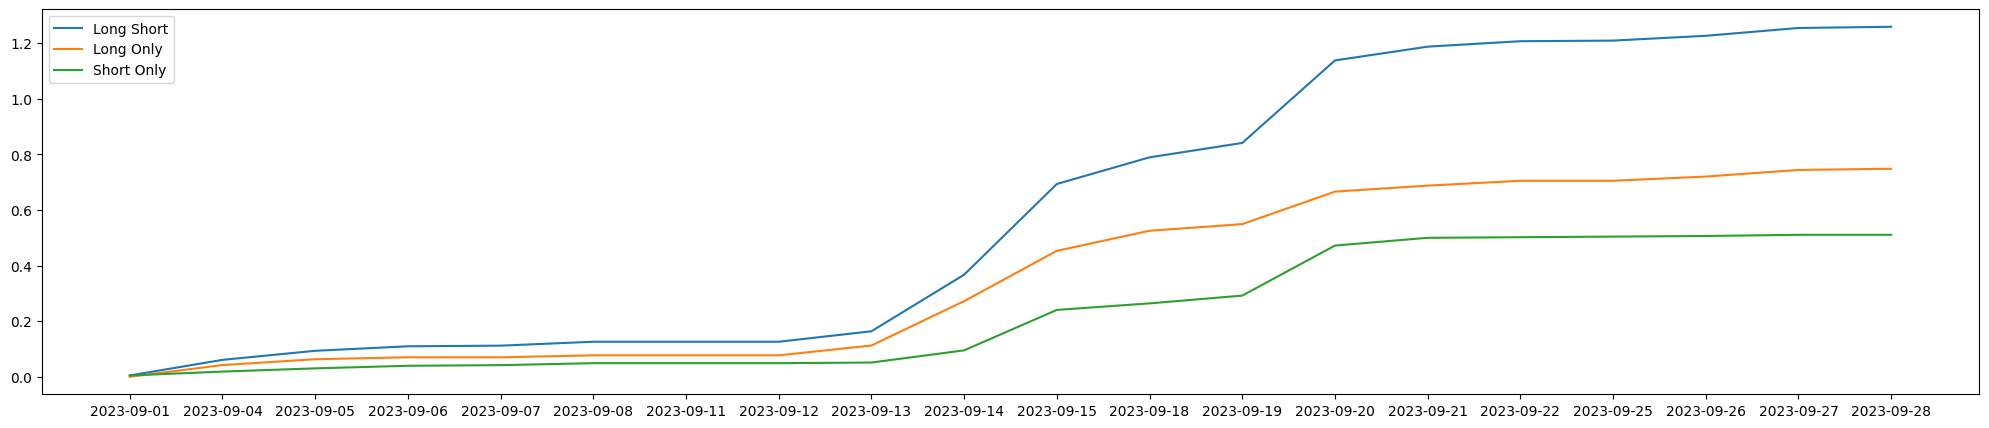

In [396]:
pred_df = pd.read_csv("predict_2603_lgbm_tick.csv")
threshold = 1e-5
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 593.45
预测准确率为: 0.7210526315789474


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 282.625
预测准确率为: 0.7210526315789474


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 310.85
预测准确率为: 0.7210526315789474


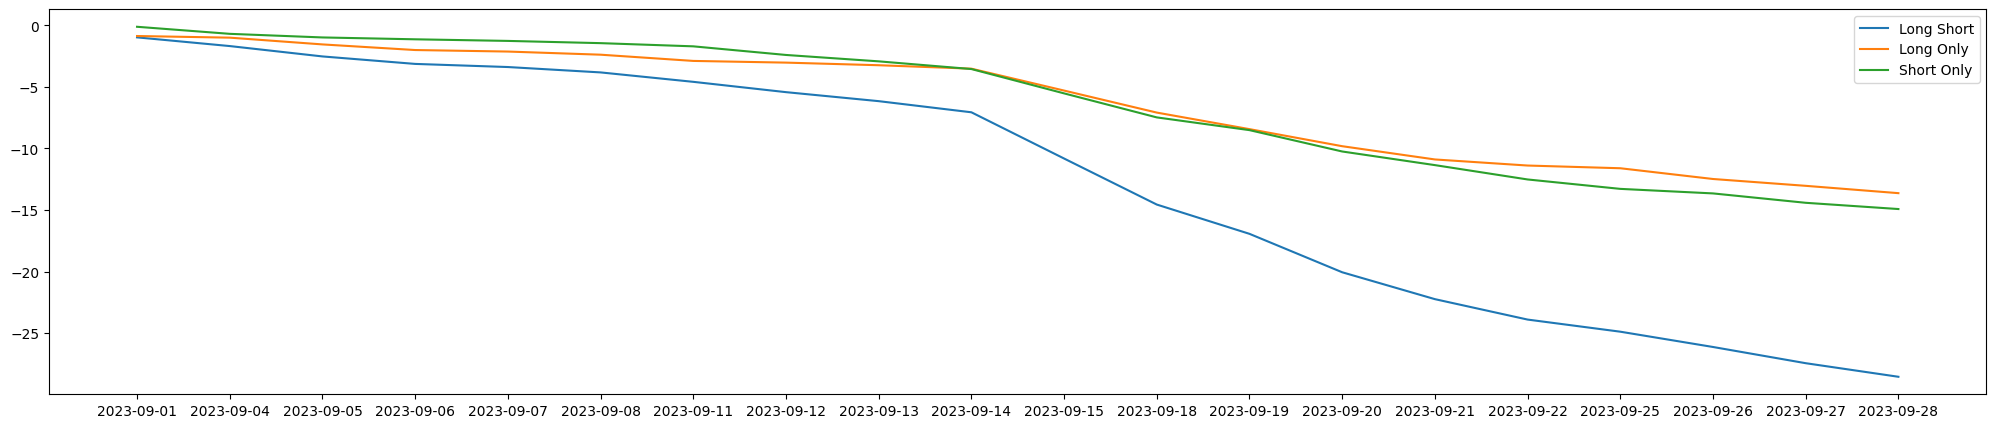

In [397]:
pred_df = pd.read_csv("predict_2603_lasso_tick.csv")
threshold = 1e-5
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 593.45
预测准确率为: 0.7210526315789474


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 282.625
预测准确率为: 0.7210526315789474


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 310.85
预测准确率为: 0.7210526315789474


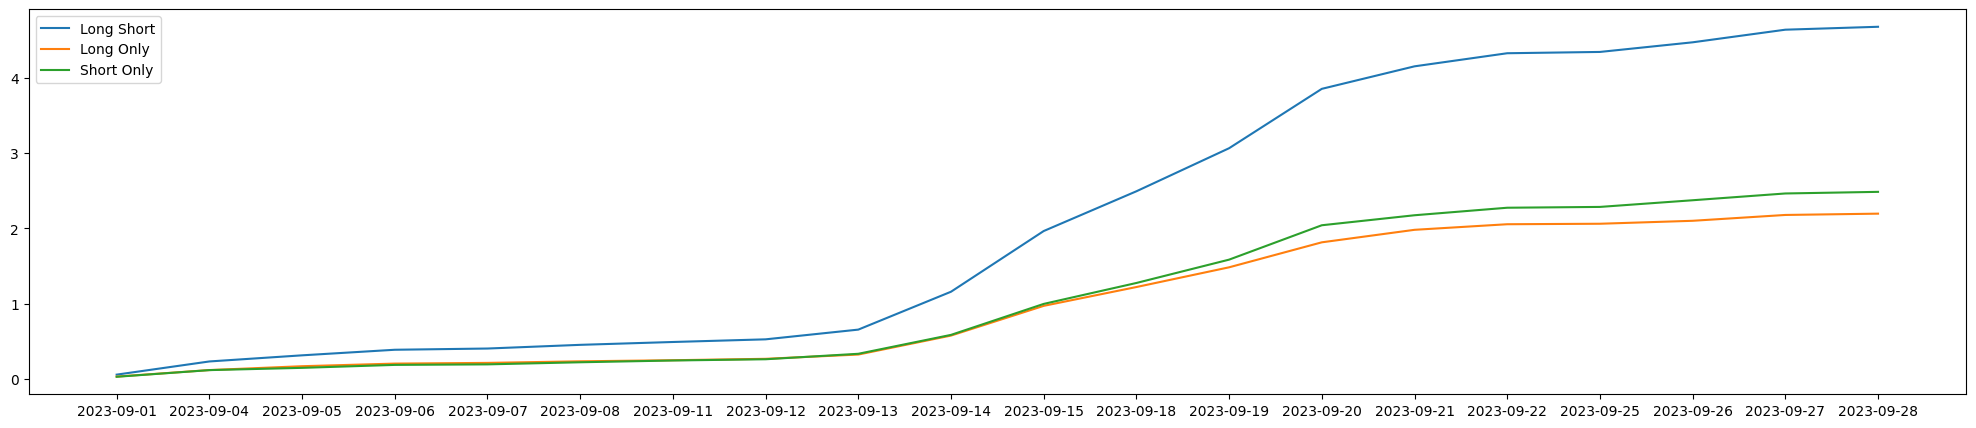

In [398]:
threshold = 1e-5
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 6434.075
预测准确率为: 0.5972168534982605


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3351.7
预测准确率为: 0.5972168534982605


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3082.4
预测准确率为: 0.5972168534982605


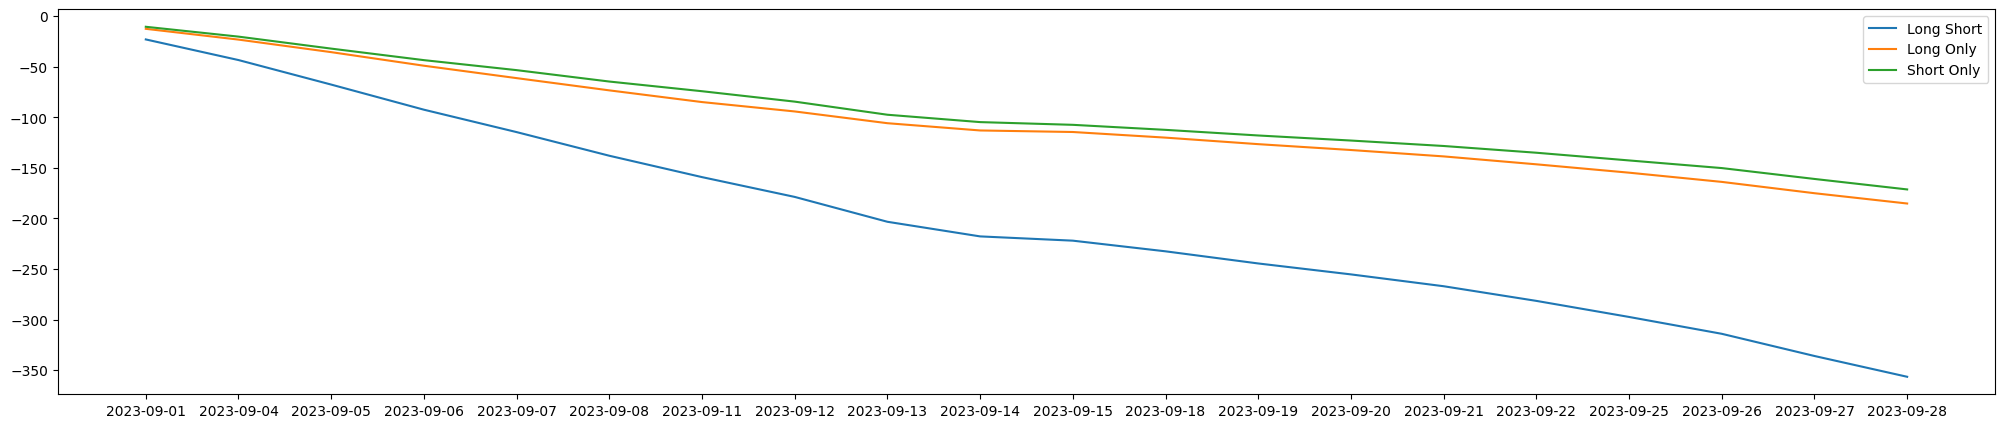

In [399]:
pred_df = pd.read_csv("predict_2603_ridge_resample.csv")
threshold = 1e-5
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 6434.075
预测准确率为: 0.5972168534982605


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3351.7
预测准确率为: 0.5972168534982605


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3082.4
预测准确率为: 0.5972168534982605


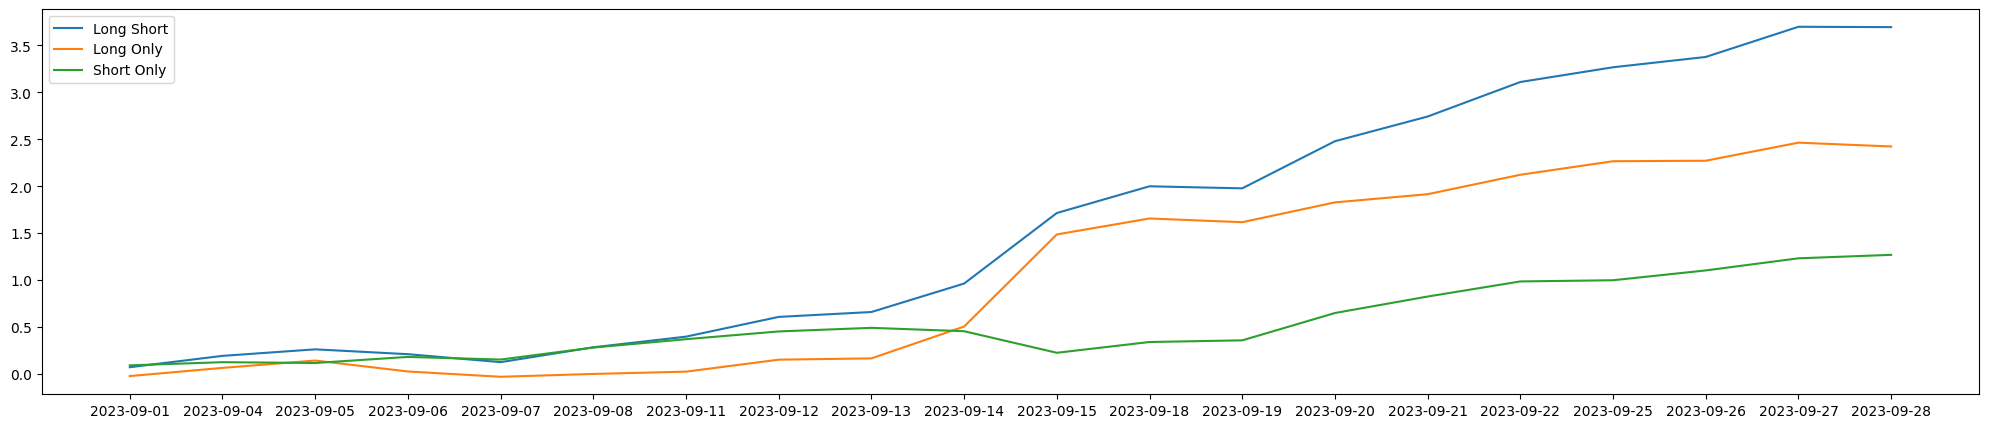

In [400]:
threshold = 1e-5
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 51.475
预测准确率为: 0.7410071942446043


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 30.675
预测准确率为: 0.7410071942446043


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 20.825
预测准确率为: 0.7410071942446043


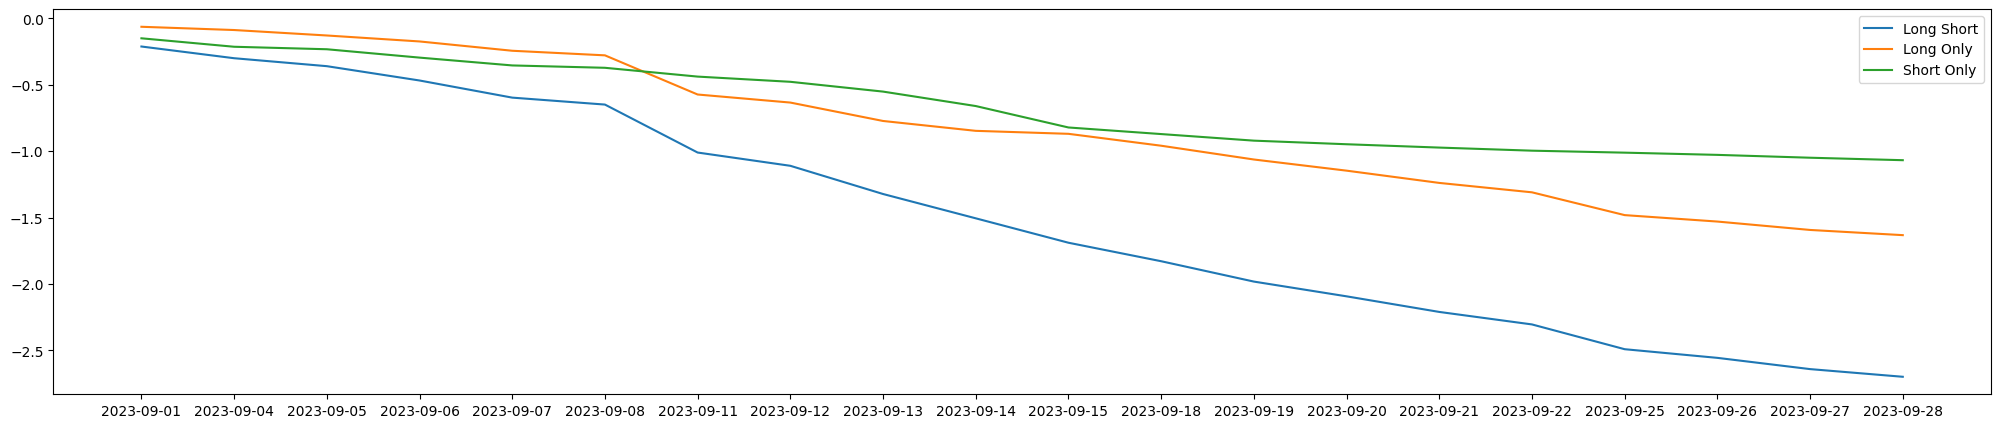

In [401]:
pred_df = pd.read_csv("predict_2330_lgbm_tick.csv")
threshold = 1e-6
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 51.475
预测准确率为: 0.7410071942446043


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 30.675
预测准确率为: 0.7410071942446043


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 20.825
预测准确率为: 0.7410071942446043


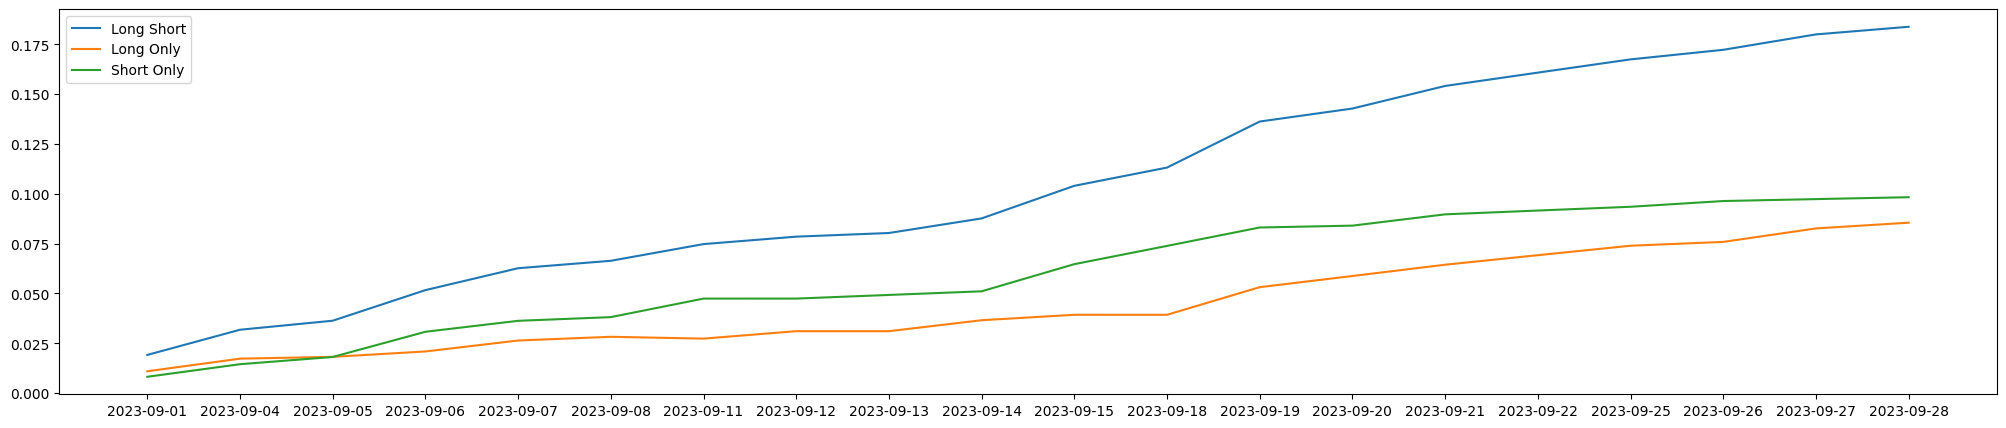

In [402]:
threshold = 1e-6
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 227.825
预测准确率为: 0.7583932853717026


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 107.475
预测准确率为: 0.7583932853717026


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 120.375
预测准确率为: 0.7583932853717026


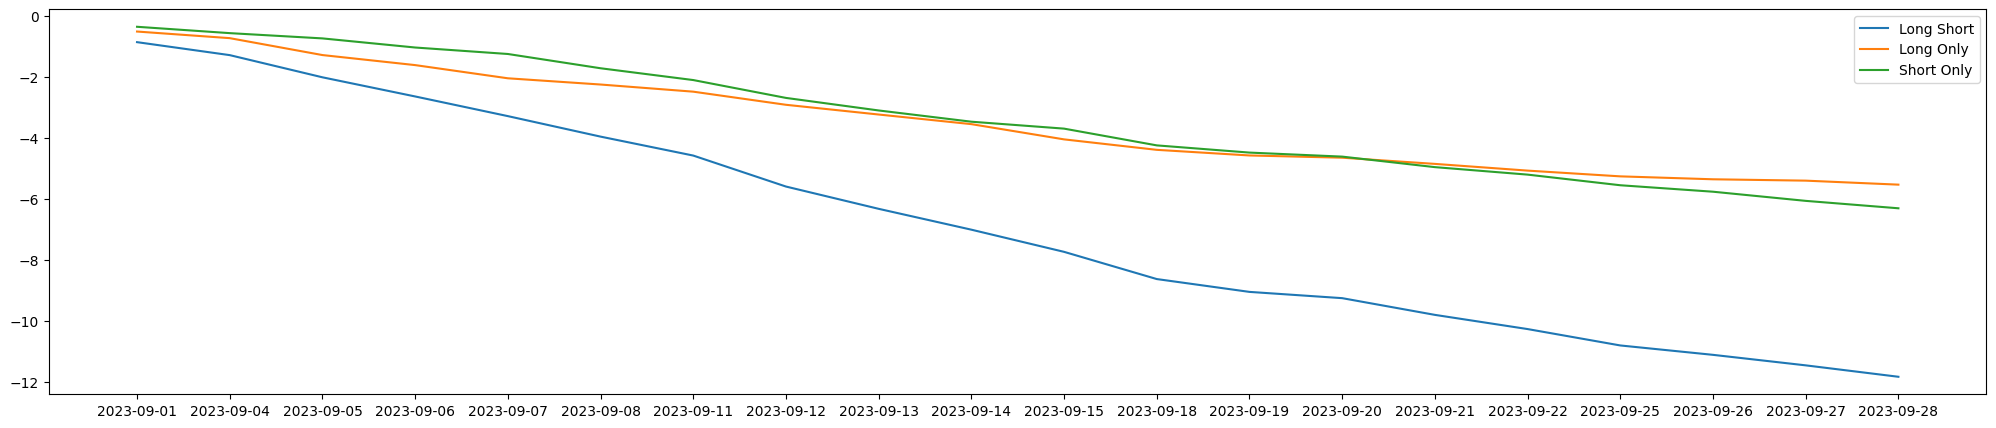

In [403]:
pred_df = pd.read_csv("predict_2330_lasso_tick.csv")
threshold = 1e-6
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 227.825
预测准确率为: 0.7583932853717026


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 107.475
预测准确率为: 0.7583932853717026


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 120.375
预测准确率为: 0.7583932853717026


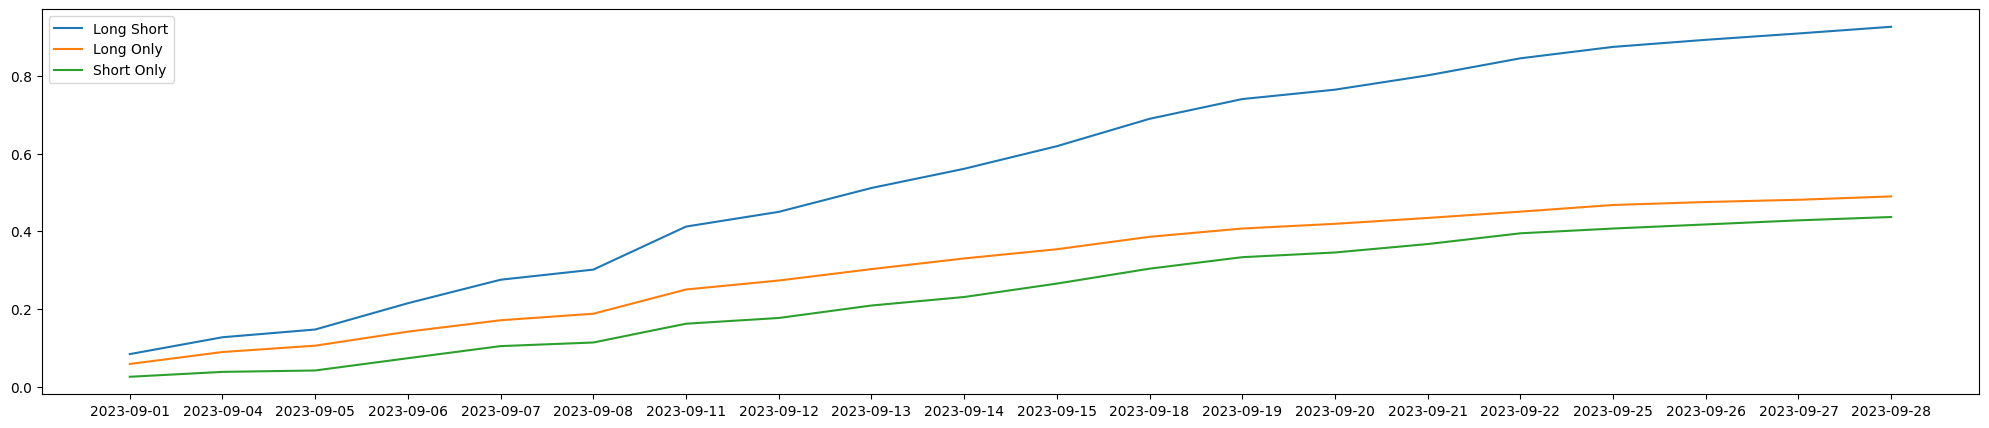

In [404]:
threshold = 1e-6
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 4591.575
预测准确率为: 0.7139561707035755


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2374.15
预测准确率为: 0.7139561707035755


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2217.45
预测准确率为: 0.7139561707035755


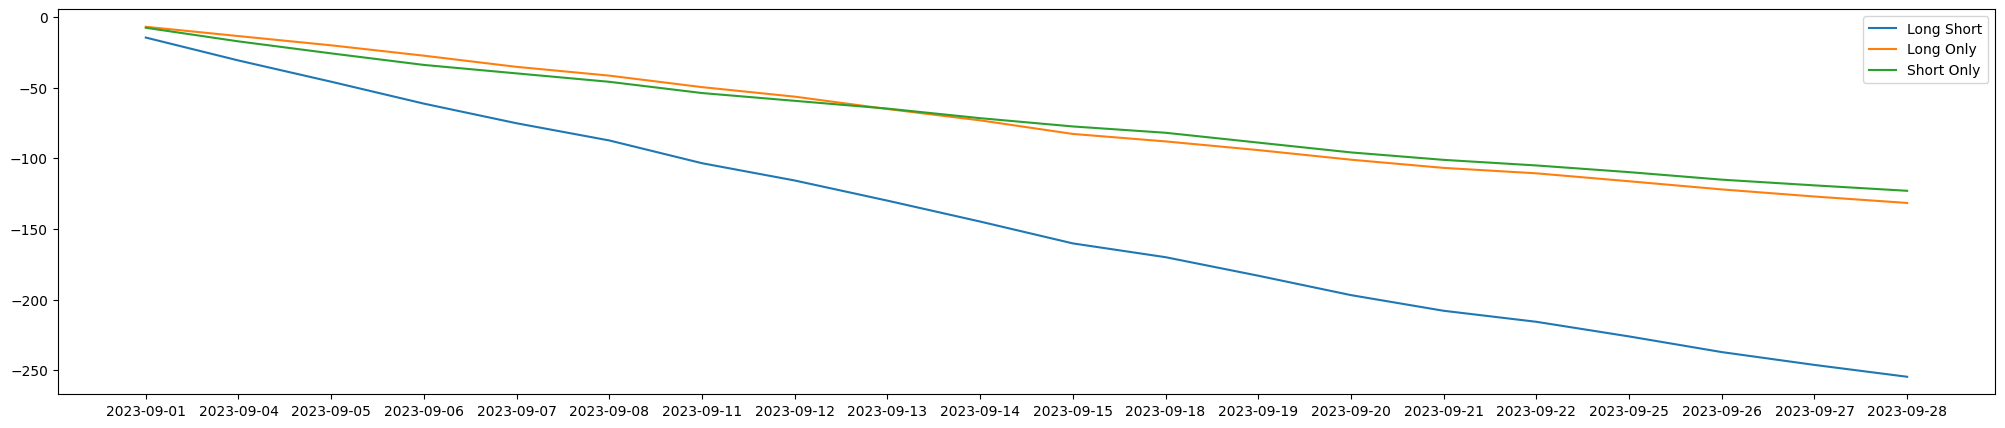

In [405]:
pred_df = pd.read_csv("predict_2330_ridge_resample.csv")
threshold = 1e-5
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 4591.575
预测准确率为: 0.7139561707035755


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2374.15
预测准确率为: 0.7139561707035755


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2217.45
预测准确率为: 0.7139561707035755


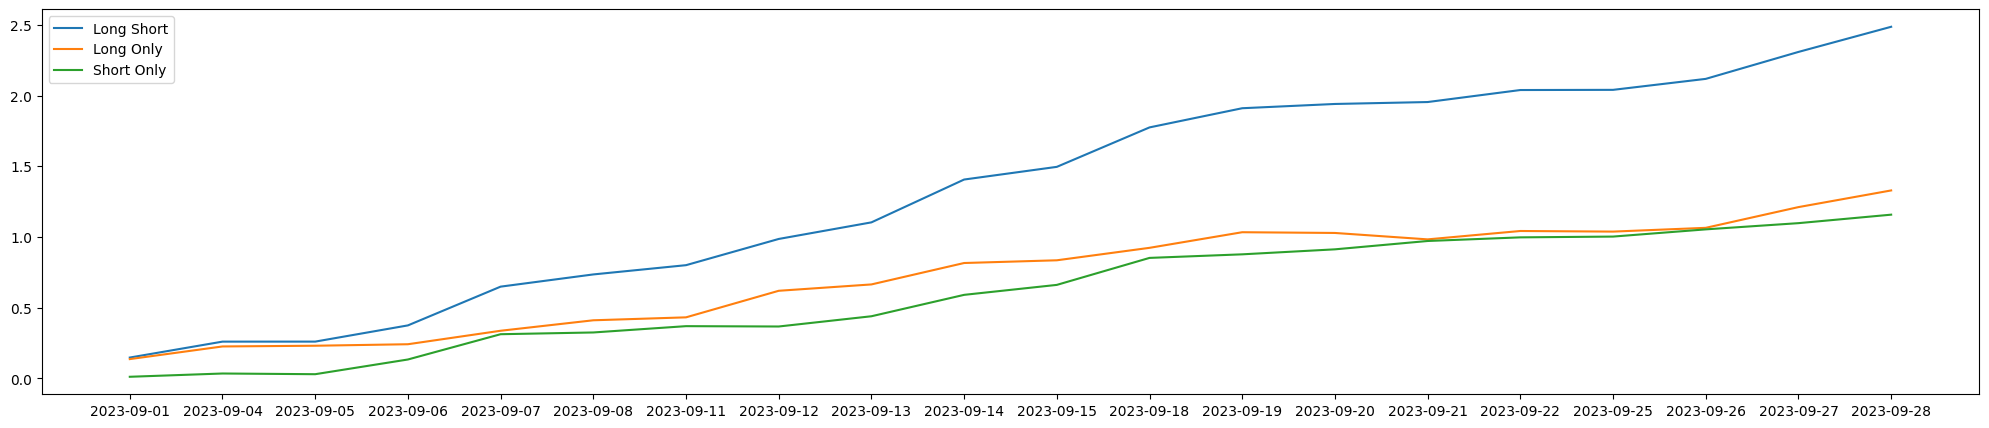

In [406]:
threshold = 1e-5
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 291.825
预测准确率为: 0.5555030703826169


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 41.475
预测准确率为: 0.5555030703826169


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 250.375
预测准确率为: 0.5555030703826169


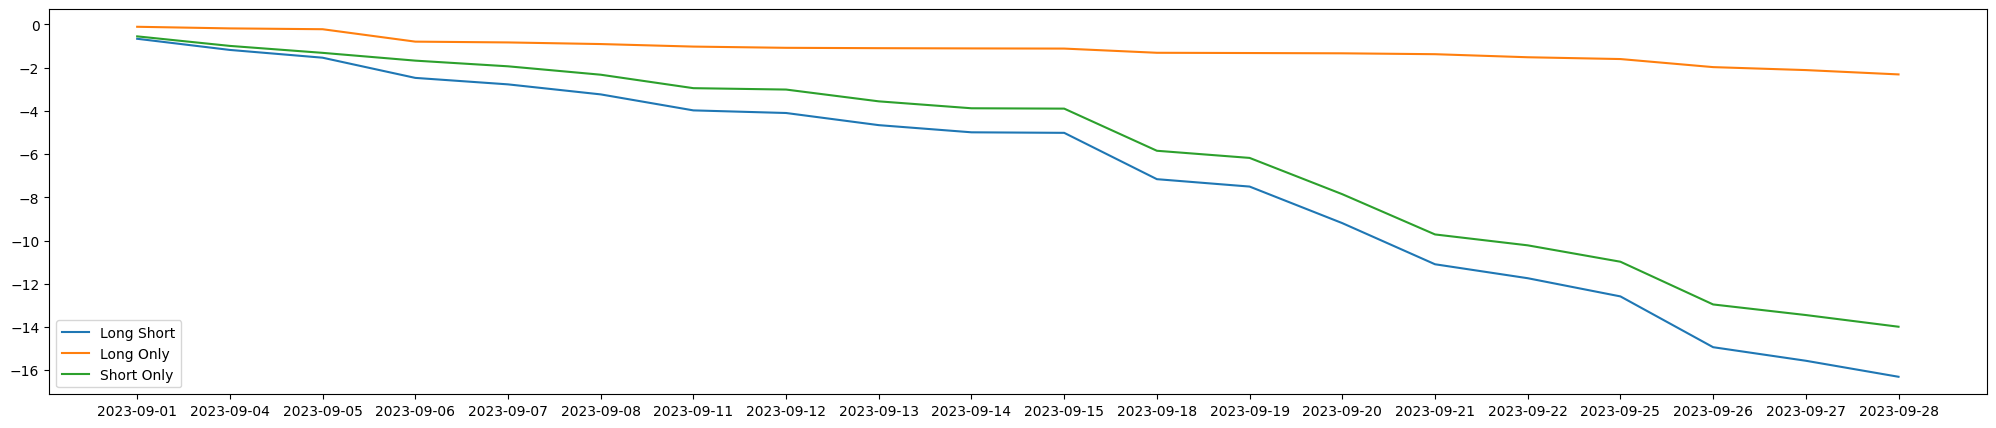

In [413]:
pred_df = pd.read_csv("predict_0050_lgbm_tick.csv")
threshold = 1e-6
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 291.825
预测准确率为: 0.5555030703826169


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 41.475
预测准确率为: 0.5555030703826169


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 250.375
预测准确率为: 0.5555030703826169


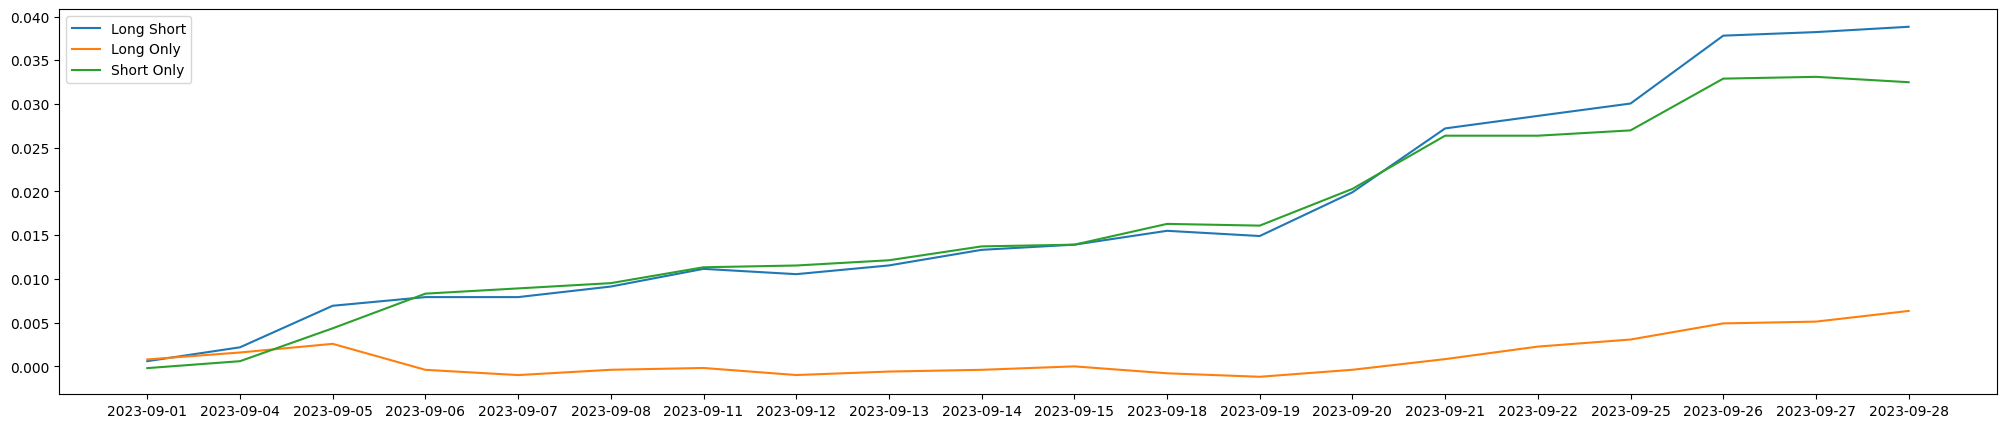

In [414]:
threshold = 1e-6
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 890.775
预测准确率为: 0.6880018894662258


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 466.8
预测准确率为: 0.6880018894662258


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 424.0
预测准确率为: 0.6880018894662258


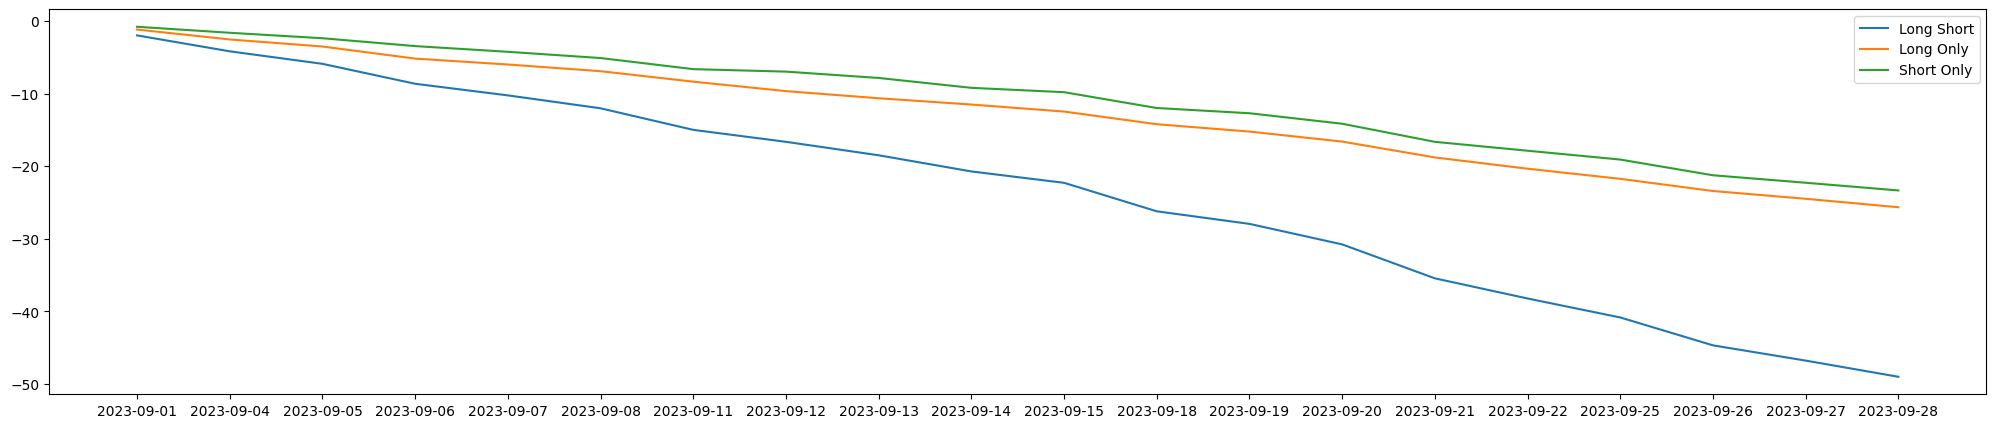

In [409]:
pred_df = pd.read_csv("predict_0050_lasso_tick.csv")
threshold = 1e-6
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 890.775
预测准确率为: 0.6880018894662258


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 466.8
预测准确率为: 0.6880018894662258


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 424.0
预测准确率为: 0.6880018894662258


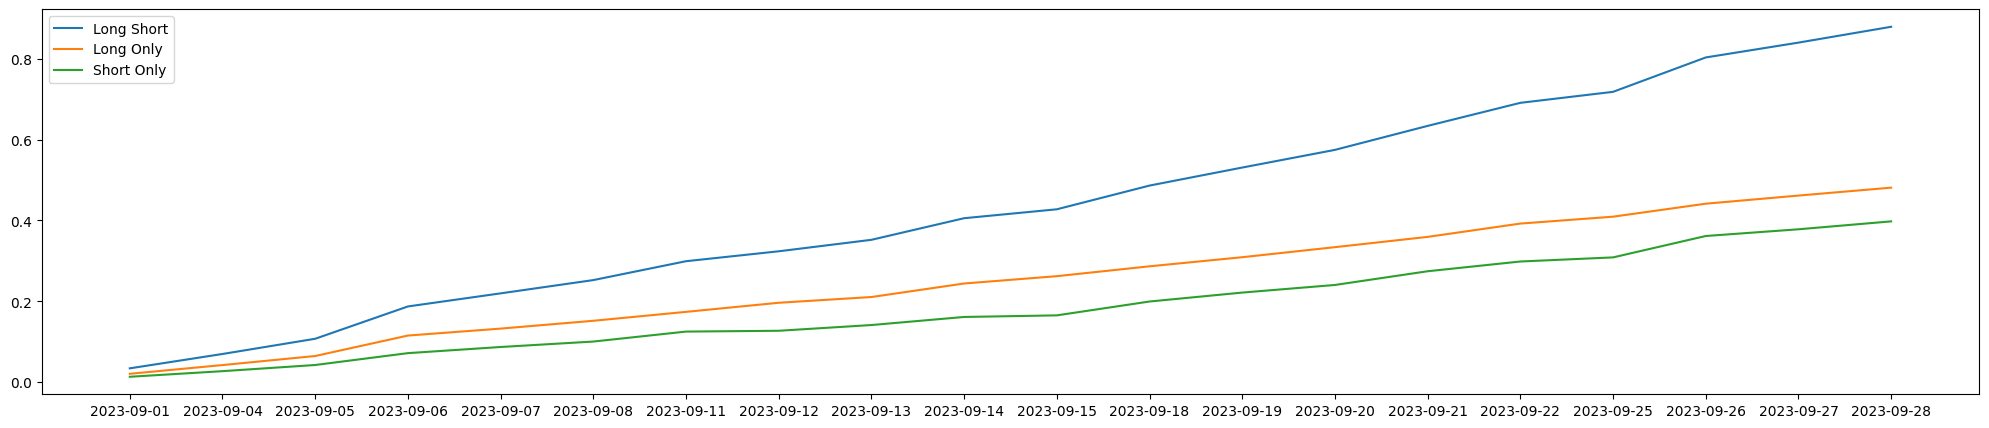

In [410]:
threshold = 1e-6
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3712.625
预测准确率为: 0.6249294184076792


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 1710.5
预测准确率为: 0.6249294184076792


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2002.15
预测准确率为: 0.6249294184076792


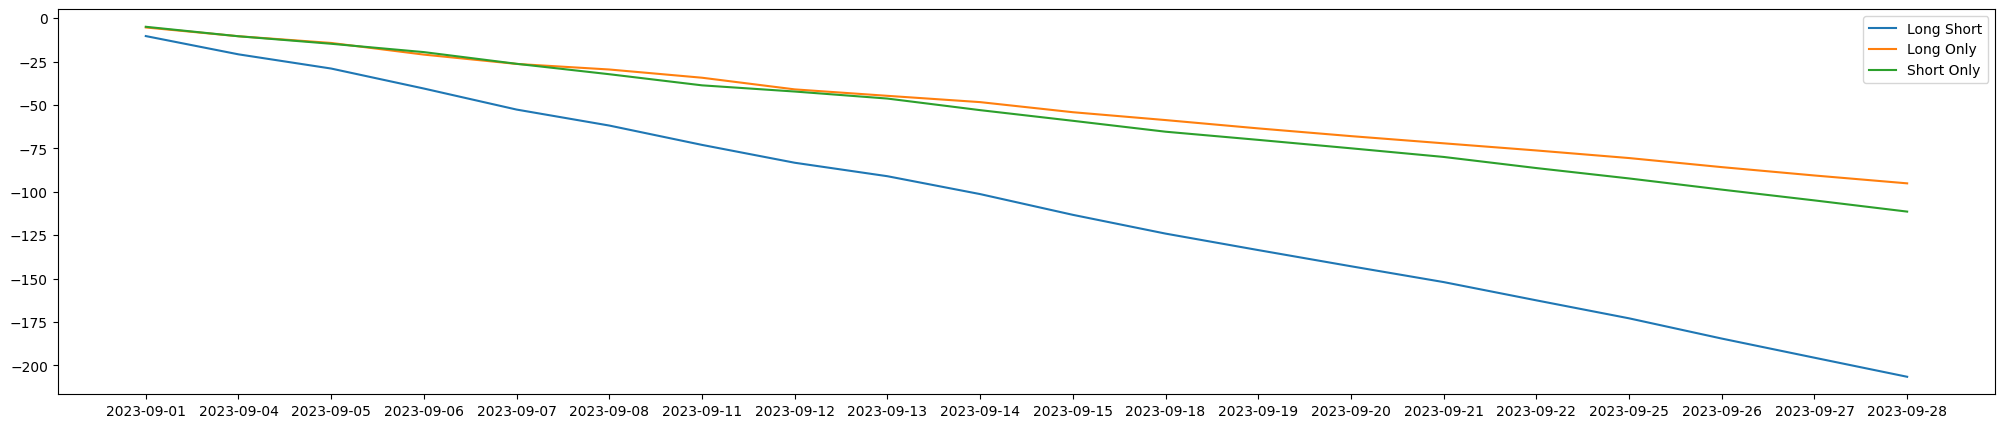

In [411]:
pred_df = pd.read_csv("predict_0050_ridge_resample.csv")
threshold = 1e-5
commision_rate = 0.0014
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 3712.625
预测准确率为: 0.6249294184076792


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 1710.5
预测准确率为: 0.6249294184076792


/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2927583036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 1


平均每天交易次数为: 2002.15
预测准确率为: 0.6249294184076792


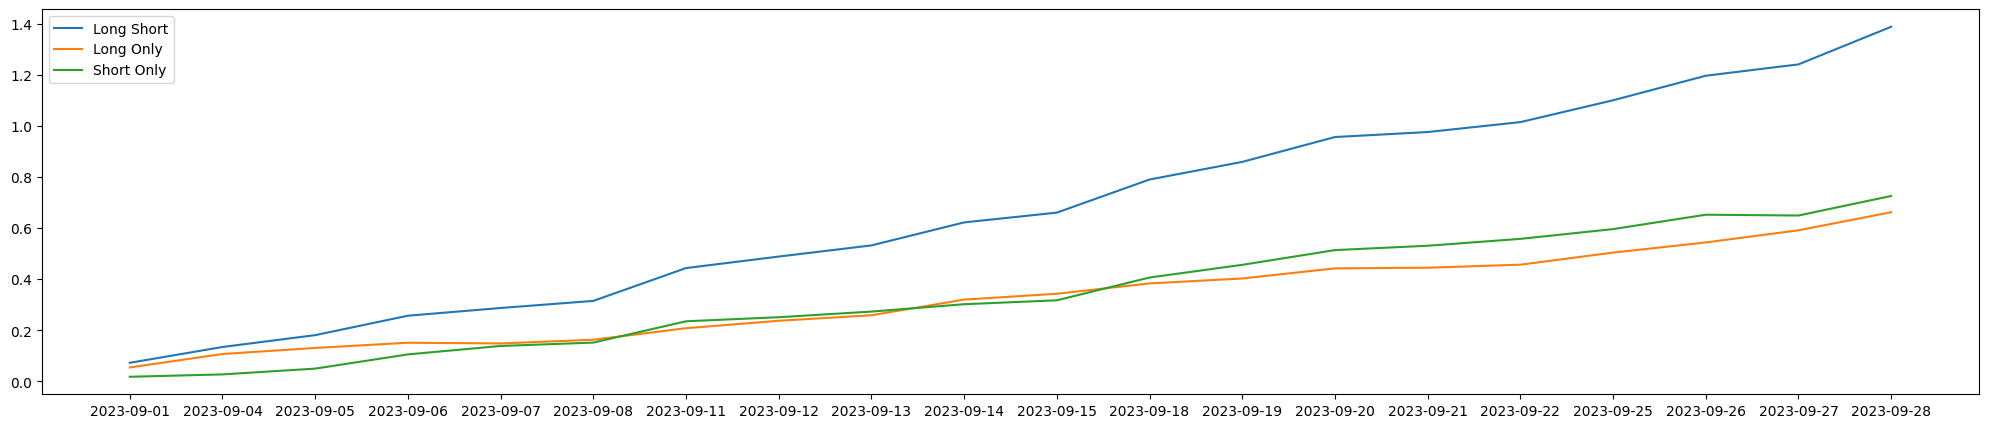

In [412]:
threshold = 1e-5
commision_rate = 0
daily_return_long_short = calculate_returns(
    pred_df, threshold, -threshold, commission_rate=commision_rate
)
daily_return_long = calculate_returns(
    pred_df, threshold, -100, commission_rate=commision_rate
)
daily_return_short = calculate_returns(
    pred_df, 100, -threshold, commission_rate=commision_rate
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

In [371]:
rand_trade = []
for i in range(len(pred_df)):
    rand_trade.append(random.randint(-1, 1))
def random_backtest(pred_df, commission_rate, trade_type):
    df = pred_df.copy()
    df['random_trade'] = rand_trade
    if trade_type == 'long':
        df['random_trade'][df.random_trade < 0] = 0
    elif trade_type == 'short':
        df['random_trade'][df.random_trade > 0] = 0
    diff = df['random_trade'].shift(1) - df['random_trade']
    diff.iloc[0] = 1
    df["returns"] = df["random_trade"] * df["y_true"] - abs(diff) * commission_rate
    df["long_count"] = df["random_trade"].apply(lambda x: 1 if x > 0 else 0)
    df["short_count"] = df["random_trade"].apply(lambda x: 1 if x < 0 else 0)
    long_count = df.groupby("date")["long_count"].sum()
    short_count = df.groupby("date")["short_count"].sum()
    daily_returns = df.groupby("date")["returns"].sum()
    return pd.DataFrame(
        {
            "long_count": long_count,
            "short_count": short_count,
            "daily_returns": daily_returns,
        }
    )

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2099636922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['random_trade'][df.random_trade < 0] = 0
/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2099636922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['random_trade'][df.random_trade > 0] = 0


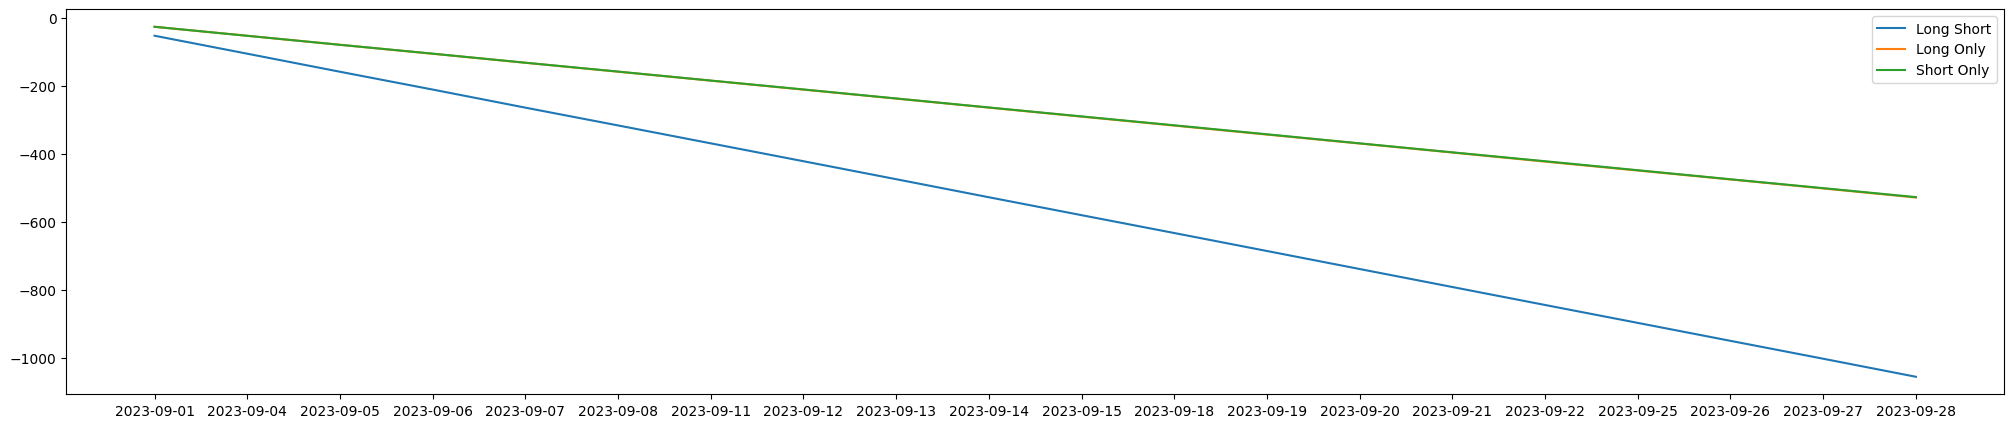

In [372]:
commision_rate = 0.0014
daily_return_long_short = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='long_short'
)
daily_return_long = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='long'
)
daily_return_short = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='short'
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()

/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2099636922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['random_trade'][df.random_trade < 0] = 0
/var/folders/rp/8c0pvywd07x0n19dc5yqt8fw0000gn/T/ipykernel_85173/2099636922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['random_trade'][df.random_trade > 0] = 0


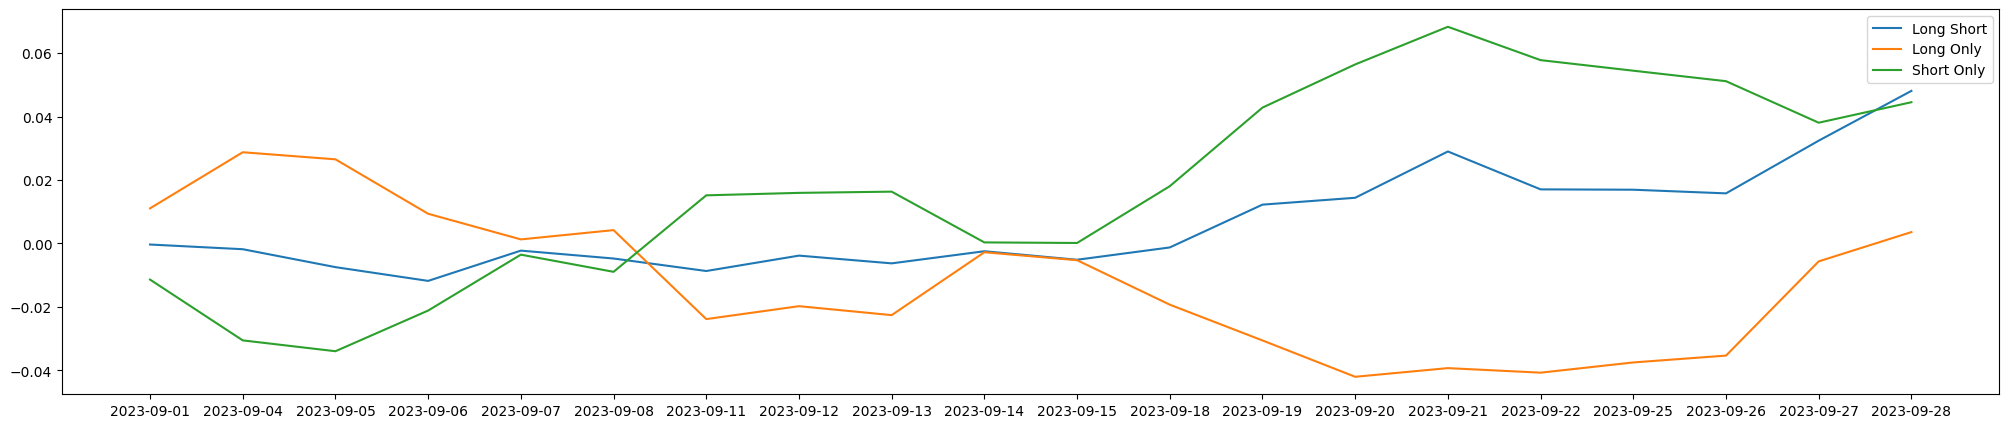

In [373]:
commision_rate = 0
daily_return_long_short = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='long_short'
)
daily_return_long = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='long'
)
daily_return_short = random_backtest(
    pred_df, commission_rate=commision_rate, trade_type='short'
)

plt.figure(figsize=(25, 5))
plt.plot(daily_return_long_short["daily_returns"].cumsum(), label="Long Short")
plt.plot(daily_return_long["daily_returns"].cumsum(), label="Long Only")
plt.plot(daily_return_short["daily_returns"].cumsum(), label="Short Only")
plt.legend()
plt.show()